<h1 align="center"> 
DATS 6103 - 10, Summer 2018, Final Project
</h1> 

<h1 align="center"> 
Model Comparrison Using Breast Cancer Data
</h1> 

<h4 align="center"> 
Author: Rayhaan Rasheed ([rrasheed@gwu.edu](mailto:yuxiaohuang@gwu.edu))
</h4>

### Project Overview
The objective of this final project is to compare three models that were discussed in the course material or in the recommended text book "Python Machine Learning 2e" by Sebastian Raschka and Vahid Mirjalili

### Brief Description of Data Set 
Title: Wisconsin Diagnostic Breast Cancer (WDBC)

Creators: 
	
    Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

Donor: Nick Street

Date: November 1995


In [257]:
%load_ext watermark
%watermark -a "Rayhaan Rasheed" -u -d -p numpy,pandas,matplotlib,sklearn,seaborn,graphviz

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Rayhaan Rasheed 
last updated: 2018-06-23 

numpy 1.14.0
pandas 0.22.0
matplotlib 2.2.2
sklearn 0.19.1
seaborn 0.8.1
graphviz 0.8.3


## Import Basic Libraries

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Assign Breast Cancer Data

In [259]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                 header=None, 
                 names=['id', 'diagnosis', 'radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'])
# Show the first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### The goal for this project is just to look at the effects of the features in relation to the diagnosis. With that being said, the standard error and "worst" columns will be omitted. This ensures that the model is not overcounting. 

In [260]:
df.drop(['id','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'], 
        axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Encode Class Label

In [261]:
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['diagnosis']))}
class_mapping

{'B': 0, 'M': 1}

In [262]:
df['diagnosis'] = df['diagnosis'].map(class_mapping)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Vizualize Correlations Between Features

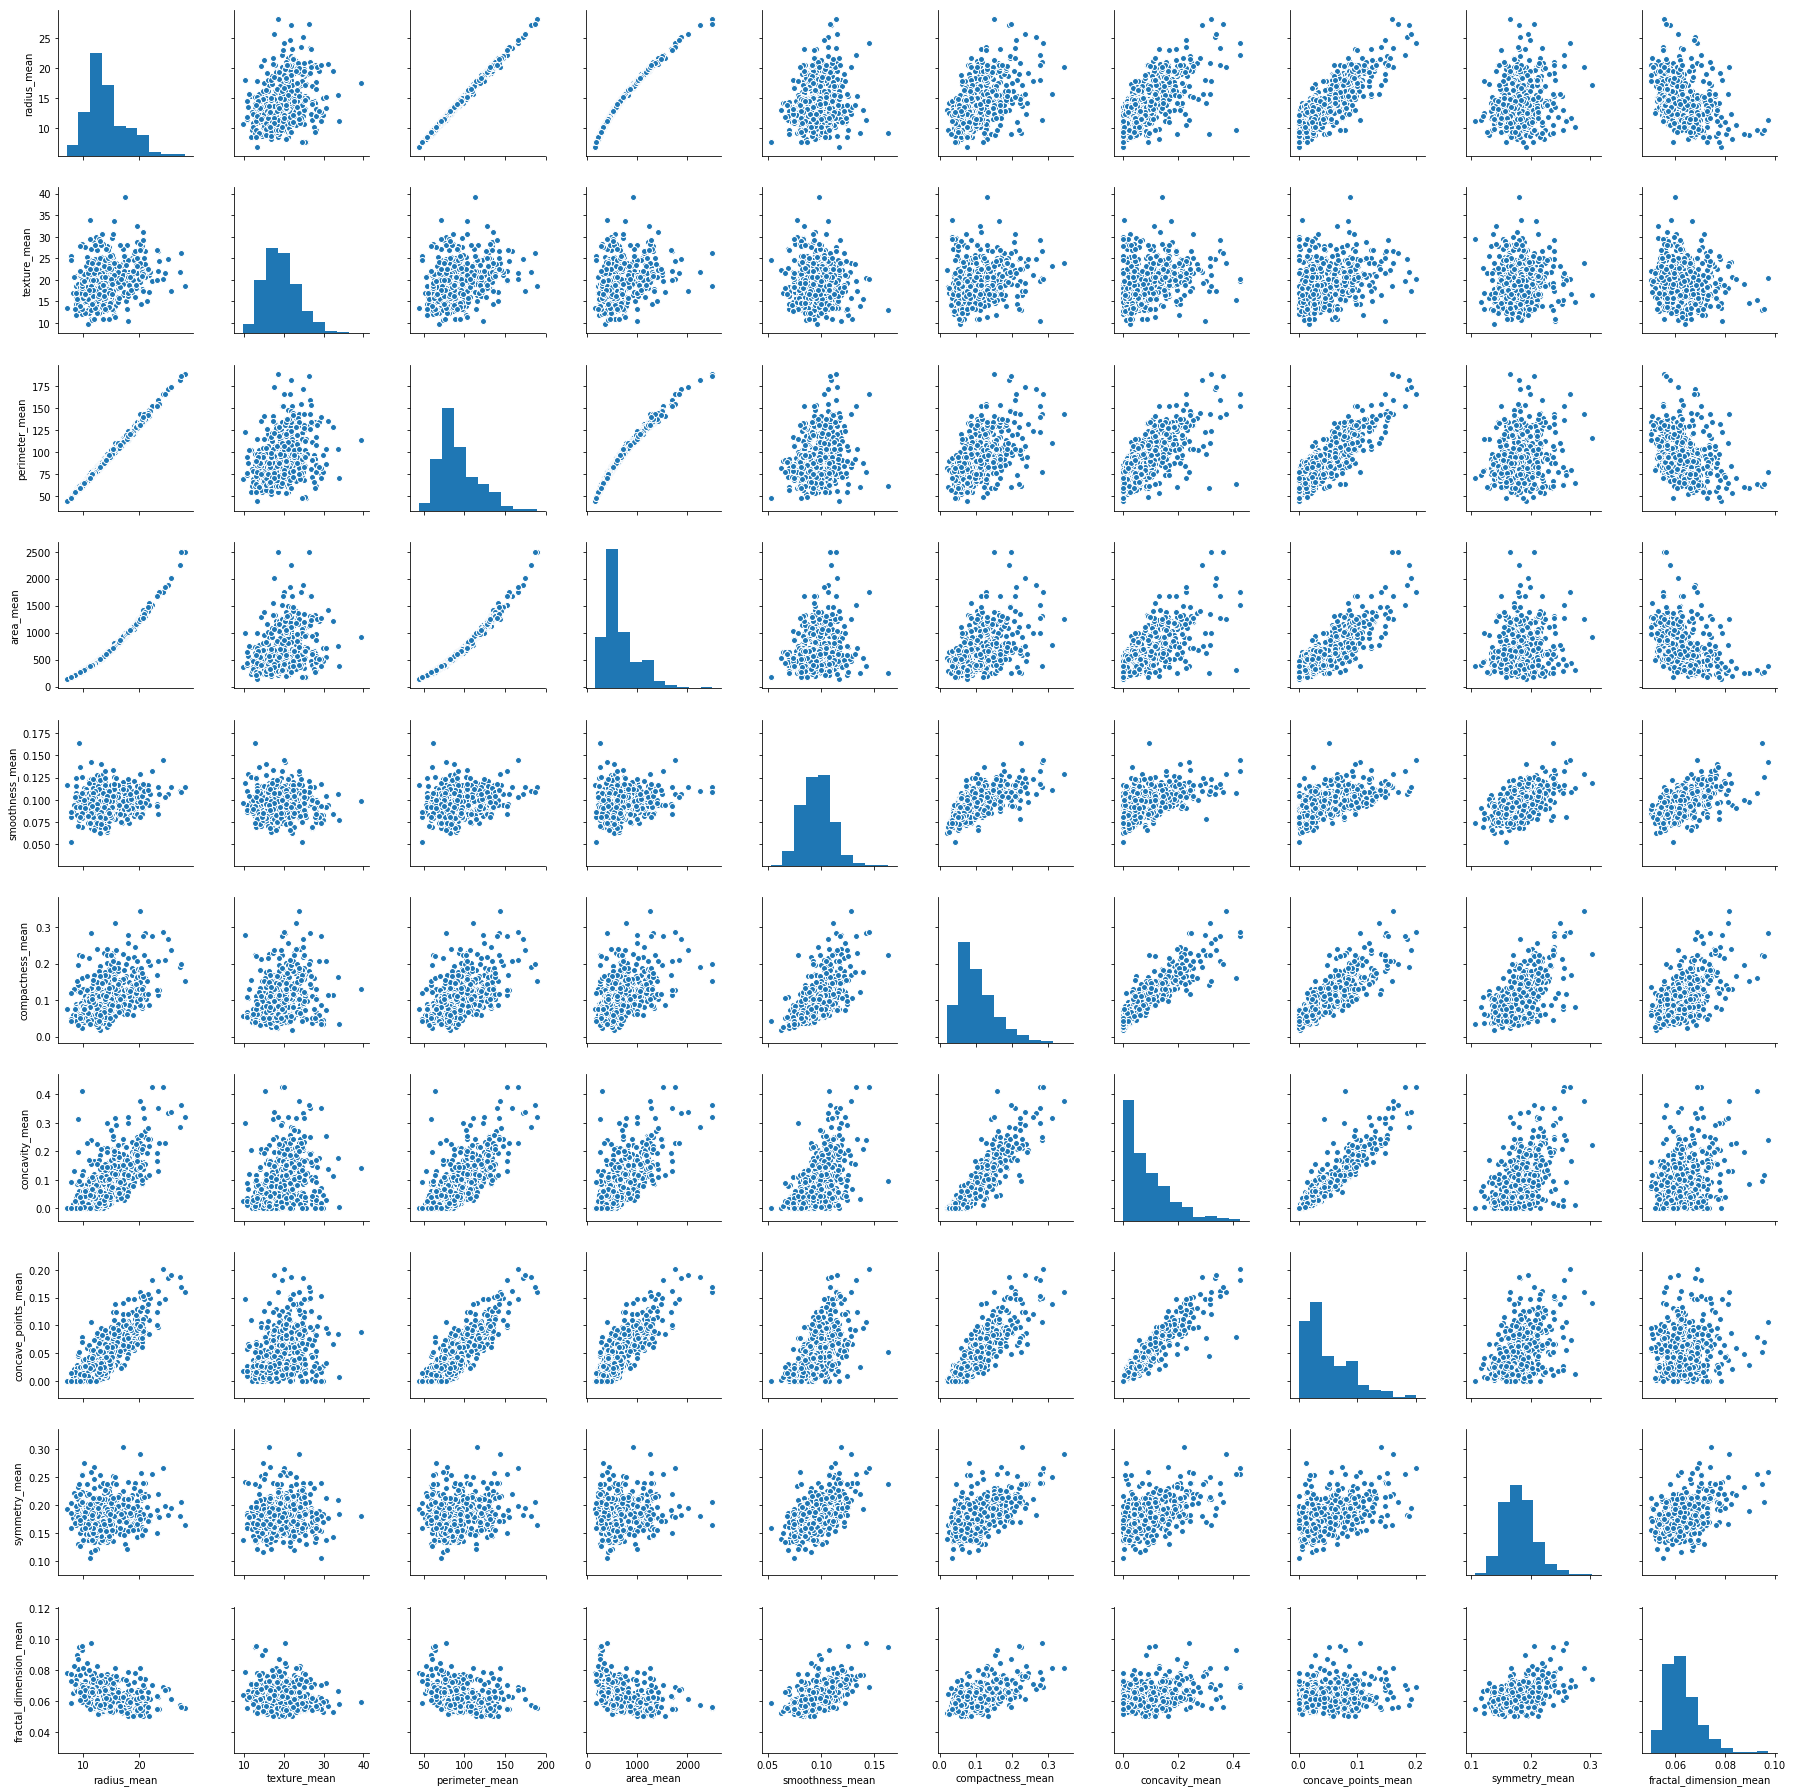

In [263]:
cols = ['radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

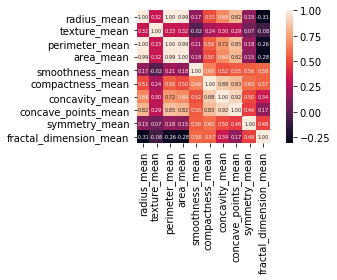

In [264]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 5},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

<break>
<break>  
<break>
<break>
<break>  
<break>

#### We see here that the perimeter and the area are both computed using the radius. If we include them in the models, then there would be a overrepresentation of the radius feature. This is why they must be omitted. 

In [265]:
df.drop(['perimeter_mean','area_mean'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Visualize Spread of Labels Given Two Features

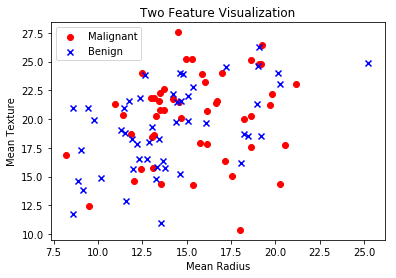

In [266]:
%matplotlib inline

# select outcomes
y = df.iloc[:, 0].values

# extract mean radius and texture
X = df.iloc[0:100, [1, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
             color='red', marker='o', label='Malignant')
plt.scatter(X[50:100, 0], X[50:100, 1],
             color='blue', marker='x', label='Benign')
plt.title("Two Feature Visualization")
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(loc='upper left')
plt.show()

#### The figure above shows that the data cannot be linarly seperable by only two features. It will require multiple features for the model to separate the class lables. Once the number of features goes beyond the third dimension, it is not possible to vizualize the data or our model. 

## Trim Data

In [267]:
# Get the feature vector
X = df.iloc[:, 1:].values

# Get the target vector
y = df.iloc[:, 0].values

In [268]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set randome_state as 0)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [269]:
from sklearn.preprocessing import StandardScaler

# Declare the standard scaler
std_scaler = StandardScaler()

# Standardize the training set

X_train = std_scaler.fit_transform(X_train)

# Standardize the testing set

X_test = std_scaler.transform(X_test)

## Perceptron Classifier

In [270]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [271]:
ppn = Perceptron()
ppn.fit(X_train,y_train)

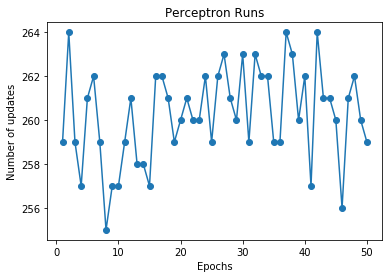

In [272]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.title("Perceptron Runs")
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [273]:
y_pred = ppn.predict(X_test)
y_pred

array([ 1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
        1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,
        1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1])

In [274]:
from sklearn.metrics import precision_recall_fscore_support
ppn_fscore = precision_recall_fscore_support(y_test, y_pred, average='micro')
ppn_fscore

(0.34502923976608185, 0.34502923976608185, 0.34502923976608185, None)

## Logistic Regression Classifier

In [275]:
class MyLogisticRegression():
    """The logistic regression class"""
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        The fit function
        
        Parameters
        ----------
        X : the feature vector
        y : the target vector
        """
        
        self.w_ = {}
        self.errors_ = []
        # For each class label
        for class_ in np.unique(y):
            self.w_[class_] = np.zeros(1 + X.shape[1])

        for _ in range(self.n_iter):
            # For each class label
            for class_ in self.w_.keys():
                delta_w = np.zeros(1 + X.shape[1])

                # For each sample
                for i in range(X.shape[0]): 
                    # Calculate the net_input
                    z = self.net_input(X, class_, i)
                    
                    # Compute logistic sigmoid activation 
                    prob = self.activation(z)
                    
                    # Get the error
                    error = (1 if y[i] == class_ else 0) - prob
                    self.errors_.append(error)
                    # Update delta_w[1:]
                    for j in range(1, X.shape[1] + 1):
                        delta_w[j] += self.eta * error * X[i][j - 1]

                    # Update delta_w[0]
                    delta_w[0] += self.eta * error

                # Update self.w_
                self.w_[class_] += delta_w


    def net_input(self, X, class_, i):
        """
        Calculate the net input
        
        Parameters
        ----------
        X : the feature vector
        class_ : a class label of the target
        
        Returns
        ----------
        The net input
       
        """
        
        # Implement me
        z = self.w_[class_][0]
        for j in range(X.shape[1]):
            z = z + np.dot(X[i][j], self.w_[class_][j+1])
        return z
    
    def activation(self, z):
        """
        Compute logistic sigmoid activation
        Reference: the function is from the "Python Machine Learning (2nd edition)" book code repository and info resource
        https://github.com/rasbt/python-machine-learning-book-2nd-edition
        """
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """
        The predict function
        
        Parameters
        ----------
        X : the feature vector
        
        Returns
        ----------
        The predicted class label of the target
        """
        
        # The list of predicted class label
        y_pred = []
        
        # For each sample
        for i in range(X.shape[0]):
            # The list of [probability, class]
            prob_classes = []
            
            for class_ in self.w_.keys():
                # Calculate the net_input
                # Implement me
                
                z = self.net_input(X, class_, i)

                # Compute logistic sigmoid activation 
                # Implement me
                
                prob = 1. / (1. + np.exp(-np.clip(z, -250, 250)))
                
                # Update prob_classes
                prob_classes.append([prob, class_])
                
            # Sort prob_classes in descending order of probability
            prob_classes = sorted(prob_classes, key=lambda x: x[0], reverse=True)
            
            # Get the predicted class label (the one with the largest probability)
            # Implement me
            
            pred_class = prob_classes[0][1]
            
            # Update y_pred
            y_pred.append(pred_class)
    
        return y_pred

In [276]:
lr = MyLogisticRegression()
lr.fit(X_train,y_train)

In [277]:
# Test the model
y_pred = lr.predict(X_test)

# Calculate the precision, recall, and fscore
lr_fscore = precision_recall_fscore_support(y_test, y_pred, average='micro')
lr_fscore

(0.9239766081871345, 0.9239766081871345, 0.9239766081871345, None)

## Decision Tree

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
dtree_fscore = precision_recall_fscore_support(y_test, y_pred, average='micro')
dtree_fscore

(0.8771929824561403, 0.8771929824561403, 0.8771929824561403, None)

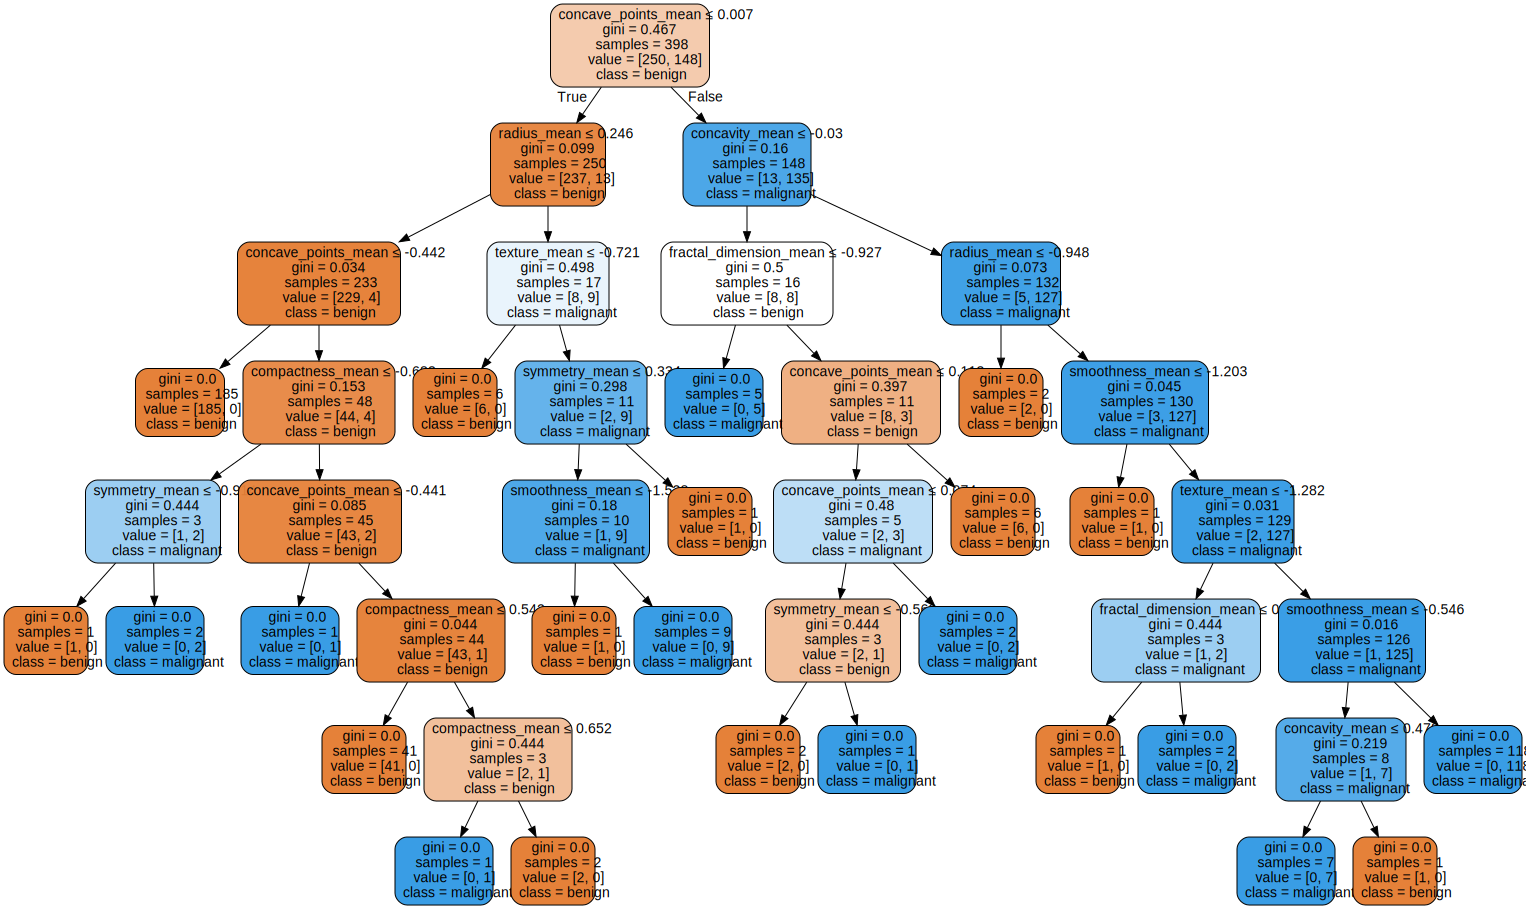

In [280]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(dtree,
                           filled=True, 
                           rounded=True,
                           class_names=['benign','malignant'],
                           feature_names=['radius_mean', 'texture_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean'],
                           special_characters=True,
                           out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Decison Tree")
graph

<break>
<break>
<break>
<break>

<break>
<break>
<break>
<break>

## Random Forest Classification

In [281]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
important = forest.feature_importances_

y_pred = forest.predict(X_test)
forest_fscore = precision_recall_fscore_support(y_test, y_pred, average='micro')
forest_fscore

(0.9122807017543859, 0.9122807017543859, 0.9122807017543859, None)

In [282]:
important

array([0.2219352 , 0.04920522, 0.01795954, 0.07402687, 0.37976324,
       0.20059452, 0.02155685, 0.03495855])

In [283]:
features = ['radius_mean', 'texture_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']

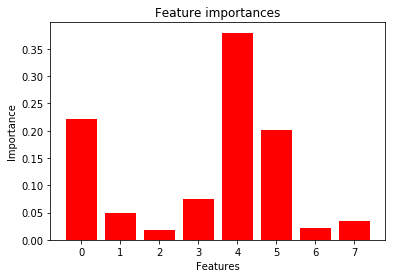

In [284]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,len(features)),important, color="r", align="center")
plt.xlabel('Features')
plt.ylabel("Importance")
plt.show()

In [285]:
print("----List of Features----")
for i in range(0,len(features)):
    line = 'X%d' %i + ': ' + features[i]
    print(line)

----List of Features----
X0: radius_mean
X1: texture_mean
X2: smoothness_mean
X3: compactness_mean
X4: concavity_mean
X5: concave_points_mean
X6: symmetry_mean
X7: fractal_dimension_mean


<break> 
<break> 

## Deeper look into Concave Points

In [293]:
df_m = df[df['diagnosis'] == 1]
df_b = df[df['diagnosis'] == 0]

con_pts = df['concave_points_mean']
con_pts_m = df_m['concave_points_mean']
con_pts_b = df_b['concave_points_mean']
diagnosis = list(df['diagnosis'])

for i in range(len(diagnosis)):
    if diagnosis[i] == 1:
        diagnosis[i] = 'M'
    else:
        diagnosis[i] = 'B'

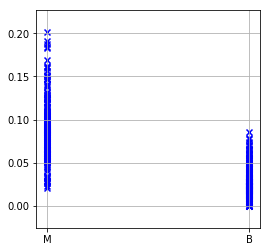

In [294]:
plt.figure(figsize=[4,4])
plt.grid()
plt.scatter(diagnosis,con_pts,color='blue',marker='x')
plt.show()

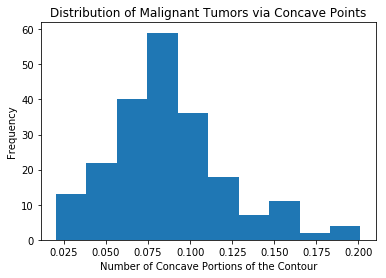

In [316]:
plt.hist(con_pts_m)
plt.title('Distribution of Malignant Tumors via Concave Points')
plt.ylabel('Frequency')
plt.xlabel('Number of Concave Portions of the Contour')
plt.show()

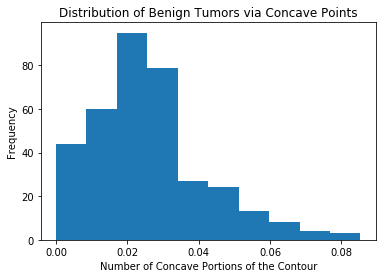

In [298]:
plt.hist(con_pts_b)
plt.title('Distribution of Benign Tumors via Concave Points')
plt.ylabel('Frequency')
plt.xlabel('Number of Concave Portions of the Contour')
plt.show()

#### Based on the figures above, it is clear that a malignant tumor would likely have a mean concave point number between 0.75 and 1.00. On ther other hand, the benign tumor falls in the range of 0.1 to 0.3 

<break> 
<break> 
<break>

## Deeper look into Radius

In [302]:
rad = df['radius_mean']
rad_m = df_m['radius_mean']
rad_b = df_b['radius_mean']

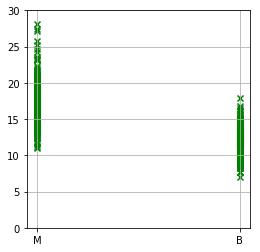

In [312]:
plt.figure(figsize=[4,4])
plt.grid()
plt.scatter(diagnosis,rad,color='green',marker='x')
plt.yticks(np.arange(0, 35, step=5))
plt.show()

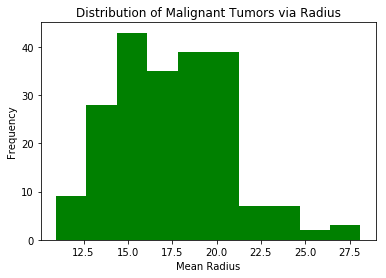

In [313]:
plt.hist(rad_m, color = 'green')
plt.title('Distribution of Malignant Tumors via Radius')
plt.ylabel('Frequency')
plt.xlabel('Mean Radius')
plt.show()

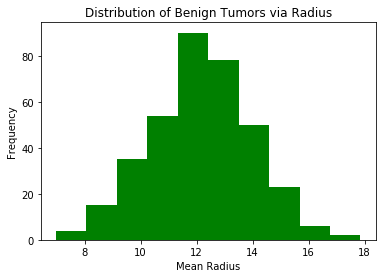

In [318]:
plt.hist(rad_b, color = 'green')
plt.title('Distribution of Benign Tumors via Radius')
plt.ylabel('Frequency')
plt.xlabel('Mean Radius')
plt.show()

#### Based on the figures above, a malignant tumor will likely have a larger average radius than a benign tumor. The histogram of the benign tumor radius shows a high level of normality with an expected value of 12 

<break> 
<break> 
<break>

## Compare the Classifiers

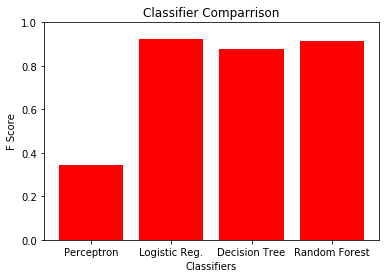

In [301]:
plt.bar(['Perceptron','Logistic Reg.','Decision Tree','Random Forest'],
        [ppn_fscore[1],lr_fscore[1],dtree_fscore[1],forest_fscore[1]], 
        align='center',
        color = 'red')
plt.title('Classifier Comparrison')
plt.xlabel('Classifiers')
plt.ylabel('F Score')
plt.ylim(0,1)
plt.show()

<break>
<break>